# Ejercicio Propio
## 1. Importar librerías instaladas 
``` pip install pandas
    pip install numpy
    pip install matplotlib
    pip install seaborn
```

In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

## 2. Archivo de conexiones realizadas por un router del ISP xyz: isp_connections.csv 
*Se realiza la lectura de las primeras líneas del archivo*

In [20]:
df=pd.read_csv('isp_connections.csv')
print(df.head())

   id protocol       source_ip  source_port         dest_ip  dest_port  \
0   0      tcp   91.106.207.43           80   45.224.149.15       6025   
1   1      tcp   45.224.149.15        59026   43.130.237.62         80   
2   2      tcp  178.237.58.228         5027   45.224.149.15        999   
3   3      tcp   170.39.194.40        45446   45.224.149.15        999   
4   4      tcp   45.224.149.15        53293  195.239.64.191         80   

        action                 time  
0  established  2025-03-09 22:15:44  
1  established  2025-03-09 14:35:52  
2  established  2025-03-09 16:27:01  
3  established  2025-03-10 05:01:13  
4  established  2025-03-10 16:08:41  


## 3. Configurar el dataframe teniendo el tiempo como índice para su análisis

In [21]:
logs_df = pd.DataFrame(df)
#print(logs_df)

# Configurar time como índice  
logs_df['time'] = pd.to_datetime(logs_df['time'])  
logs_df = logs_df.sort_values('time')

print(logs_df)


        id protocol       source_ip  source_port          dest_ip  dest_port  \
3880  3880      tcp  170.39.193.187            4    45.224.149.15          9   
765    765      tcp   91.106.207.43           80    45.224.149.15         34   
1781  1781      tcp   45.224.149.15           99  156.253.227.215         80   
3163  3163      tcp   45.224.149.15           44    162.0.232.216          4   
3850  3850      tcp  192.168.20.168            5   142.250.98.188         80   
...    ...      ...             ...          ...              ...        ...   
3263  3263      tcp   45.224.149.15           52   20.190.190.131         80   
2330  2330      tcp  199.188.205.22            4    45.224.149.15          4   
1775  1775      tcp  103.169.35.190            4    45.224.149.15          3   
564    564      tcp   45.224.149.15          999   152.42.160.160          3   
2096  2096      tcp   45.224.149.15           60    95.129.234.27          4   

           action                time  

## 4. Generar los gráficos del análisis


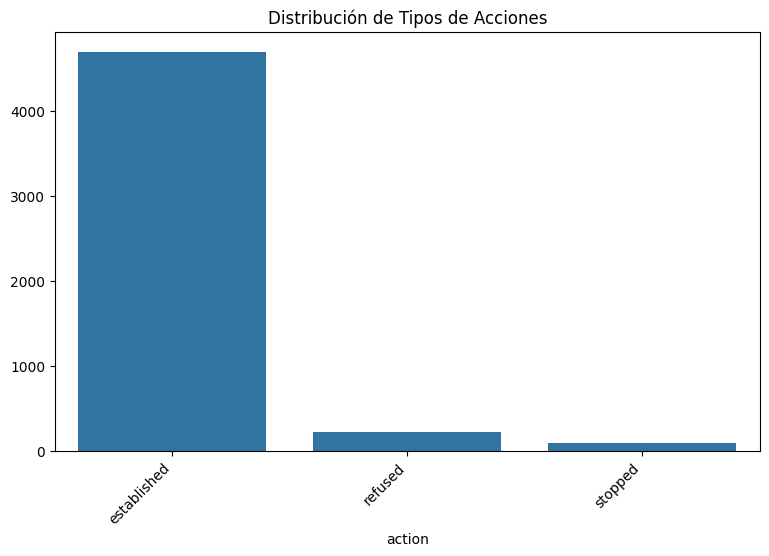

In [22]:
# Ahora creamos las visualizaciones  
plt.figure(figsize=(15, 10))

# 1. Distribución de conexiones por tipo de accion  
plt.subplot(2, 2, 1)  
procotol_count = logs_df['action'].value_counts()  
sns.barplot(x=procotol_count.index, y=procotol_count.values)  
plt.xticks(rotation=45, ha='right')  
plt.title('Distribución de Tipos de Acciones')  
plt.tight_layout()

Text(0.5, 1.0, 'Distribución de Conexiones por protocolo')

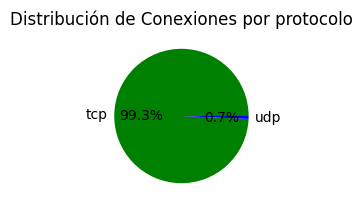

In [23]:
# 2. Distribución de conexiones por protocolo  
plt.subplot(2, 2, 2)  
severidad_count = logs_df['protocol'].value_counts()  
colors = {'tcp': 'green', 'udp': 'blue', 'icmp': 'orange'}  
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',  
    colors=[colors[sev] for sev in severidad_count.index])  
plt.title('Distribución de Conexiones por protocolo')

Text(0, 0.5, 'Número de Conexiones')

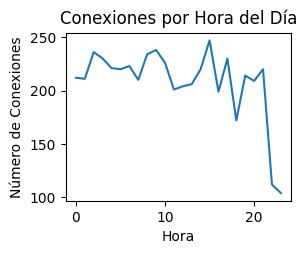

In [24]:
# 3. Conexiones por hora del día  
plt.subplot(2, 2, 3)  
logs_df['hour'] = logs_df['time'].dt.hour  
hourly_count = logs_df.groupby('hour').size()  
sns.lineplot(x=hourly_count.index, y=hourly_count.values)  
plt.title('Conexiones por Hora del Día')  
plt.xlabel('Hora')  
plt.ylabel('Número de Conexiones')


<Figure size 1200x600 with 0 Axes>

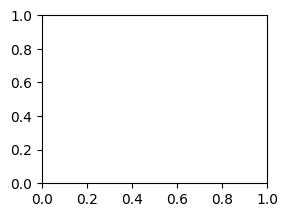

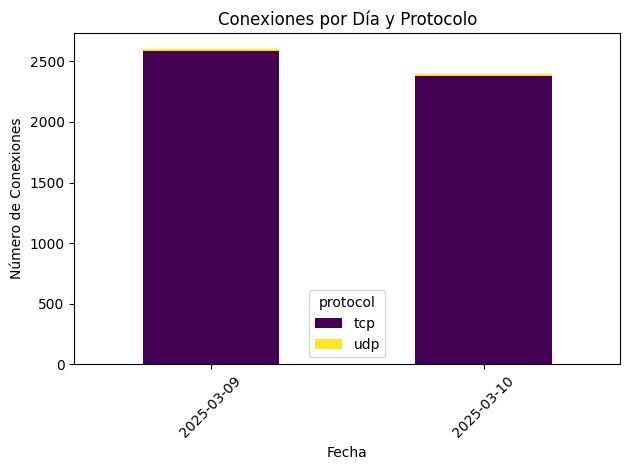

<Figure size 1200x600 with 0 Axes>

In [25]:
# 4. Conexiones por día y por protocolo  
plt.subplot(2, 2, 4)  
logs_df['date'] = logs_df['time'].dt.date  
pivot_table = pd.crosstab(logs_df['date'], logs_df['protocol'])  
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')  
plt.title('Conexiones por Día y Protocolo')  
plt.xlabel('Fecha')  
plt.ylabel('Número de Conexiones')  
plt.xticks(rotation=45)

plt.tight_layout()  
plt.savefig('security_dashboard.png')

# Crear gráfico de actividad sospechosa  
plt.figure(figsize=(12, 6))

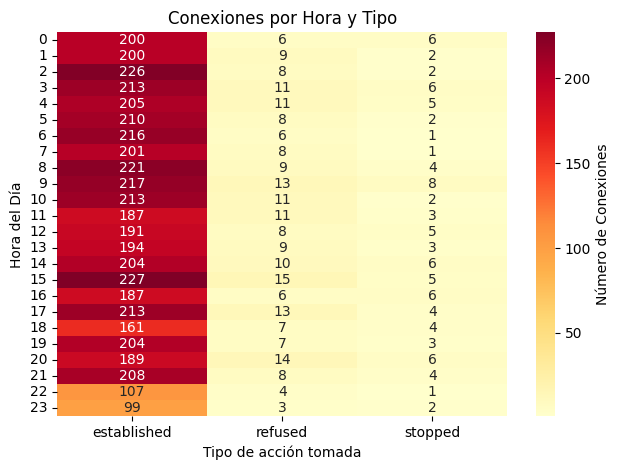

In [27]:
# 5. Mapa de calor de conexiones por hora y tipo de acción  
logs_df['hour'] = logs_df['time'].dt.hour  
heatmap_data = pd.crosstab(logs_df['hour'], logs_df['action'])  
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Número de Conexiones'})  
plt.title('Conexiones por Hora y Tipo')  
plt.xlabel('Tipo de acción tomada')  
plt.ylabel('Hora del Día')  
plt.tight_layout()  
plt.savefig('activity_heatmap.png')

<Figure size 1000x600 with 0 Axes>

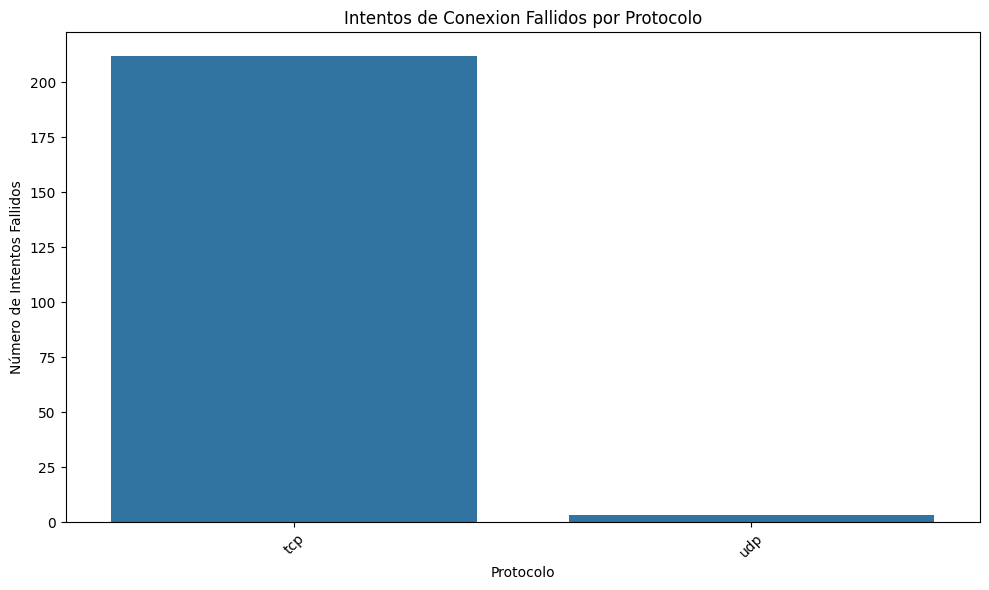

In [28]:
# 6. Análisis de conexiones fallidas por accion y protocolo  
plt.figure(figsize=(10, 6))  

# Filtrar los conexiones fallidas para ambos protocolos
failed_logins_tcp = logs_df[(logs_df['action'] == 'refused') & (logs_df['protocol'] == "tcp")]
failed_logins_udp = logs_df[(logs_df['action'] == 'refused') & (logs_df['protocol'] == "udp")]

# Combinar los datos de ambos protocolos
failed_logins_combined = pd.concat([failed_logins_tcp, failed_logins_udp])

# Contar los conexiones fallidas por protocolo
protocol_failures = failed_logins_combined['protocol'].value_counts()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=protocol_failures.index, y=protocol_failures.values)
plt.title('Intentos de Conexion Fallidos por Protocolo')
plt.xlabel('Protocolo')
plt.ylabel('Número de Intentos Fallidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_logins_by_protocol.png')

Visualizaciones generadas correctamente. Revisa los archivos .png generados.


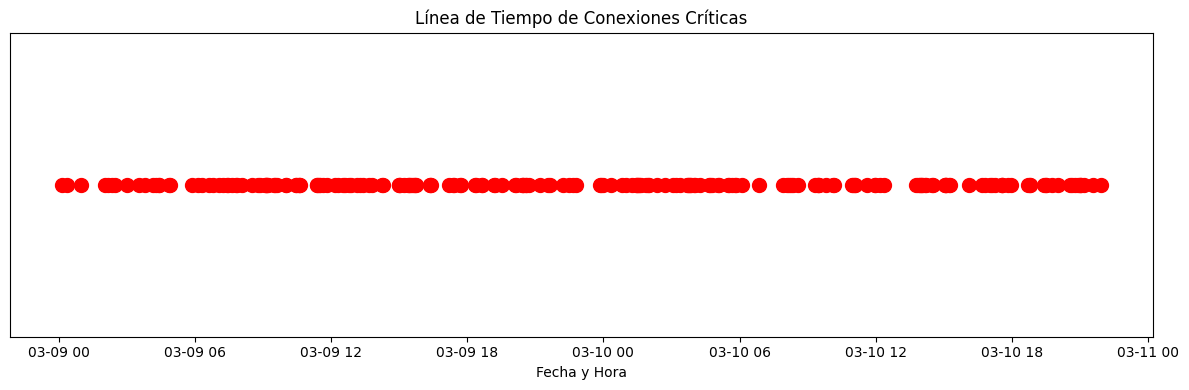

In [29]:
# 7. Línea de tiempo de conexiones críticas  
plt.figure(figsize=(12, 4))  
critical_events = logs_df[logs_df['action'] == 'refused']  
plt.scatter(critical_events['time'], [1]*len(critical_events), c='red', s=100)  
plt.yticks([])  
plt.title('Línea de Tiempo de Conexiones Críticas')  
plt.xlabel('Fecha y Hora')  
plt.tight_layout()  
plt.savefig('critical_events_timeline.png')

print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")